In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('C:/Users/maxen/Downloads/data_v1.0.csv', usecols=range(2,13))

# Partie 1
## Exercice 1

In [84]:
data.isnull().sum()

date           91
cheveux       103
age            91
exp            96
salaire        95
sexe          100
diplome       110
specialite     93
note          114
dispo         106
embauche        0
dtype: int64

In [4]:
# On constate que les données ont été récupéréés sur 5 années durant
print(pd.to_datetime(data['date'], infer_datetime_format=True).min(),
pd.to_datetime(data['date'], infer_datetime_format=True).max())


2010-01-01 00:00:00 2014-12-31 00:00:00


In [5]:
y = pd.to_datetime(data['date'], infer_datetime_format=True).dt.year
m = pd.to_datetime(data['date'], infer_datetime_format=True).dt.month
d = pd.to_datetime(data['date'], infer_datetime_format=True).dt.day

In [6]:
print(y.mean(), y.median())
print(m.mean(), m.median())
print(d.mean(), d.median())

2012.0030137123913 2012.0
6.531920237078708 7.0
15.628610176302175 16.0


C:\Users\maxen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


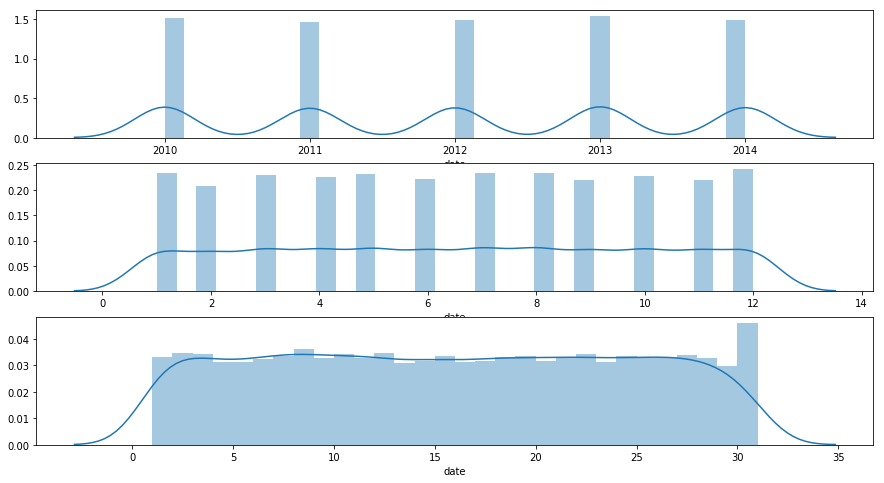

In [10]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.distplot(y.dropna(), bins =30)
plt.subplot(312)
sns.distplot(m.dropna(), bins =30)
plt.subplot(313)
sns.distplot(d.dropna(), bins =30)
plt.show()

C:\Users\maxen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


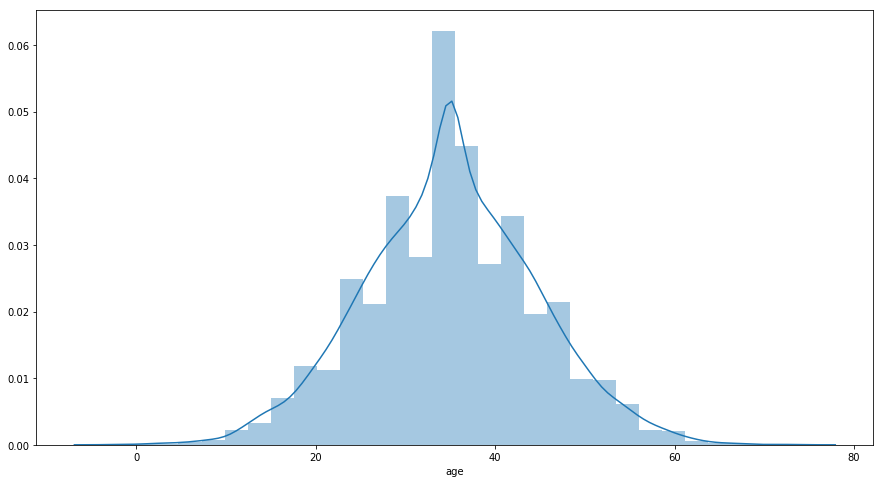

In [11]:
plt.figure(figsize=(15,8))
sns.distplot(data.age.dropna(), bins =30)
plt.show()

In [33]:
print(data.age.dropna().mean(), data.age.dropna().median(), data.age.dropna().mode())

35.00452056858707 35.0 0    35.0
dtype: float64


In [15]:
data['age'] = data['age'].fillna(35)

C:\Users\maxen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


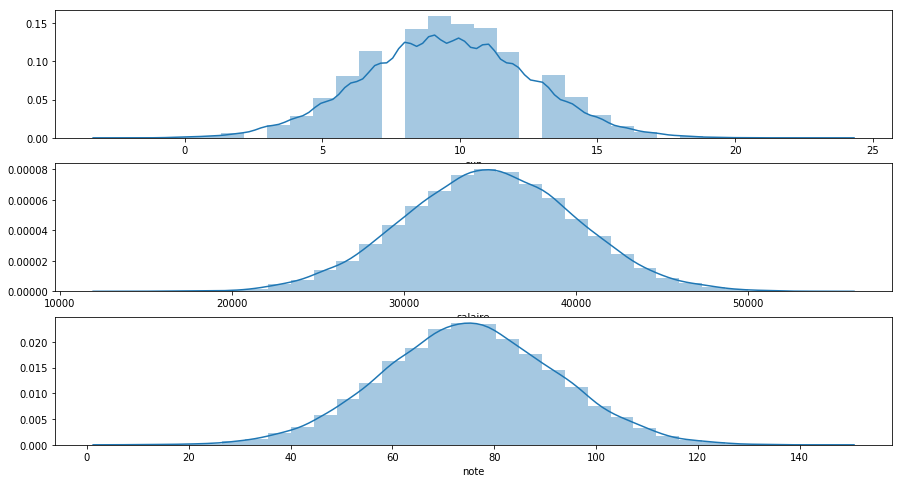

In [12]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.distplot(data.exp.dropna(), bins =30)
plt.subplot(312)
sns.distplot(data.salaire.dropna(), bins =30)
plt.subplot(313)
sns.distplot(data.note.dropna(), bins =30)
plt.show()

In [23]:
print(data.cheveux.value_counts(),
data.sexe.value_counts(),
data.diplome.value_counts(),
data.specialite.value_counts(),
data.dispo.value_counts(), sep ='\n')

chatain    6022
brun       5991
blond      5929
roux       1955
Name: cheveux, dtype: int64
M    11889
F     8011
Name: sexe, dtype: int64
master      7513
licence     7377
doctorat    2547
bac         2453
Name: diplome, dtype: int64
geologie       10028
forage          4340
detective       4155
archeologie     1384
Name: specialite, dtype: int64
non    11848
oui     8046
Name: dispo, dtype: int64


## Exercice 2
### Question a

In [26]:
import scipy.stats as ss
import numpy as np

#Création d'un  tableau croisé
crosstab = pd.crosstab(data.specialite, data.sexe, rownames=['specialite'], colnames=['sexe'])
  
#Test de cramer
def cramers(crosstab):
    chi2 = ss.chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    return np.sqrt(chi2 / (n*(min(crosstab.shape)-1)))
  
result = cramers(crosstab)
print(result)

0.36972941631623524


### Question b

In [24]:
data2 = data[data.index.isin(data['cheveux'].dropna().index)][['cheveux', 'salaire']]
data3 = pd.concat([pd.get_dummies(data2.cheveux), data2.salaire], axis = 1)

In [25]:
data3 = data3.dropna()

In [26]:
import statsmodels.api as sm

C:\Users\maxen\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [27]:
model = sm.OLS(endog=data3.salaire, exog=data3[['blond','brun','chatain', 'roux']]).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salaire   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     29.53
Date:                Sun, 12 May 2019   Prob (F-statistic):           4.84e-19
Time:                        19:16:51   Log-Likelihood:            -1.9673e+05
No. Observations:               19802   AIC:                         3.935e+05
Df Residuals:                   19798   BIC:                         3.935e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
blond       3.467e+04     65.029    533.120      0.000    3.45e+04    3.48e+04
brun        3.503e+04     64.657    541.758      0.000    3.49e+04    3.52e+04
chatain      3.54e+04     64.522    548.594      0.000    3.53e+04    3.55e+04
roux        3.443e+04    113.278    303.960      0.000    3.42e+04    3.47e+04
==============================================================================
Omnibus:                        0.058   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.061
Skew:                          -0.004   Prob(JB):                        0.970
Kurtosis:                       2.997   Cond. No.                         1.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""